# <center> 👉 class_11_2 IP » _Feature Matching - BFMatcher, FLANN_ </center>

# ▣ Feature Matching 

__Feature matching is the process of comparing feature points and feature descriptors in two different images and pairing them with similar objects.__   
        
    Feature matching이란 서로 다른 두 이미지에서 특징점과 특징 디스크립터들을 비교해서 비슷한 객체끼리 짝짓는 것을 말합니다. 

OpenCV provides the following feature matching interface functions for feature matching.  
- Brute-Force Matcher : __BFMatcher__  
- FLANN(Fast Library for Approximate Nearest Neighbors Matching) Based Matcher : __FLannBasedMatcher__

### ■ **matcher = cv2.DescriptorMatcher_create(matcherType):**   
    
>- matcherType:    
>>- "BruteForce": BFMatcher w/NORM_L2
>>- "BruteForce-L1": BFMatcher w/NORM_L1, 
>>- "BruteForce-Hamming": BRMatcher w/NORM_HAMMING, 
>>- "BruteForce-Hamming(2)": BRMatcher w/NORM_HAMMING2, 
>>- "FlannBased": FlannBasedMatcher w/NORM_L2  

The feature matcher created by the **cv2.DescriptorMatcher_create()** function compares two descriptors to each other and matches them with these three functions:  
### ■  __match(), knnMatch(), radiusMatch()__     
>- All three functions find a match for the second parameter - trainDescriptors, based on the first parameter - queryDescriptors.  

        >- cv2.DescriptorMatcher_create() 함수를 통해 생성된 특징 매칭기는 두 개의 디스크립터를 서로 비교하여 매칭 해주는 함수 :  
        >- match(), knnMatch(), radiusMatch()   
        >- 세 함수 모두 첫 번째 파라미터인 queryDescriptors를 기준으로 두 번째 파라미터인 trainDescriptors에 맞는 매칭을 찾습니다.   

1. **matches = matcher.match(queryDescriptors, trainDescriptors, mask):** 1 Best Match
    - queryDescriptors: Features descriptor array, which will be the basis for matching 특징 디스크립터 배열, 매칭의 기준이 될 디스크립터
    - trainDescriptors: Features descriptor array, the descriptor that will be the object of matching 특징 디스크립터 배열, 매칭의 대상이 될 디스크립터
    - mask(optional): Matching Progress Mask 매칭 진행 여부 마스크
    - matches: Matching Results, List of DMatch Objects 매칭 결과, DMatch 객체의 리스트  
>- The match() function finds the best match for a single queryDescriptors and returns it as a result.   
>- However, in some cases, the best match may not be found, so the number of matching results returned may be lower than the number in queryDescriptors.  

    >- match() 함수는 queryDescriptors 한 개당 최적의 매칭을 이루는 trainDescriptors를 찾아 결과로 반환합니다.   
    >- 그러나 최적 매칭을 찾지 못하는 경우도 있기 때문에 반환되는 매칭 결과 개수가queryDescriptors의 개수보다 적을 수도 있습니다.  

2. **matches = matcher.knnMatch(queryDescriptors, trainDescriptors, k, mask, compactResult):** k closest matches k개의 가장 근접한 매칭
    - k : Number of proximity neighbors to match 매칭할 근접 이웃 개수
    - compactResult(optional) : True: If no match is found, the match result is not included 매칭이 없는 경우 매칭 결과에 불포함 (default=False)
>- The knnMatch() function finds and returns from trainDescriptors as many as the number of nearest neighbors per queryDescriptors.   
>- k is the third parameter. By the number of k closest neighbors means that it returns the match value of k closest neighbors.   
>- If CompactResult is passed a default value of False, add a row to the result that holds the ID of queryDescriptors, even if no match result is found.  
>- If True is passed, it doesn't add anything.  

    >- knnMatch() 함수는 queryDescriptors 한 개당 k개의 최근접 이웃 개수만큼 trainDescriptors에서 찾아 반환합니다.   
    >- k는 세 번째 파라미터입니다. k개의 최근접 이웃 개수만큼이라는 말은 가장 비슷한 k개만큼의 매칭 값을 반환한다는 뜻입니다.   
    >- CompactResult에 default값이 False가 전달되면 매칭 결과를 찾지 못해도 결과에 queryDescriptors의 ID를 보관하는 행을 추가합니다.  
    >- True가 전달되면 아무것도 추가하지 않습니다.  

3. **matches = matcher.radiusMatch(queryDescriptors, trainDescriptors, maxDistance, mask, compactResult):** Matching distances within maxDistance 
    - maxDistance: Matching Target Distance 매칭 대상 거리  
        
    >- The radiusMatch() function finds and returns trainDescriptors that are within maxDistance from queryDescriptors.
        
        >- radiusMatch() 함수는 queryDescriptors에서 maxDistance 이내에 있는 trainDescriptors를 찾아 반환합니다.  
        
### ■ **match(), knnMatch(), radiusMatch()** returns a list of **DMatch objects**.  

>- **DMatch:** Objects that represent matching results 
    >>- queryIdx: queryDescriptors index
    >>- trainIdx: trainDescriptors index
    >>- imgIdx: trainDescriptor index
    >>- distance: Similarity Distance
>- The queryIdx and trainIdx in the DMatch object tell you which point in the two images matched each other.   
>- You can also see how close it is to the distnace.  

>- DMatch 객체의 queryIdx와 trainIdx로 두 이미지의 어느 지점이 서로 매칭 되었는지 알 수 있습니다.   
>- 또한 distnace로 얼마나 가까운 거리 인지도 알 수 있습니다.  

### ■ **cv2.drawMatches(img1, kp1, img2, kp2, matches, flags):**   

A function that combines two images into one and connects the matching points with a line to visually express the matching result.  
        매칭 결과를 시각적으로 표현하기 위해 두 이미지를 하나로 합쳐서 매칭점끼리 선으로 연결하는 함수  
    
- img1, kp1: queryDescriptor img and keypoints
- img2, kp2: trainDescriptor img and keypoints
- matches: results
- flags: draw line option:  
>- cv2.DRAW_MATCHES_FLAGS_DEFAULT: Generate a new resulting image (default),   
>- cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG: No new resulting images, 
>- cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS: Drawing feature key point size and orientation,   
>- cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS: NOT DRAW SINGLE_POINTS

## ▶ BFMatcher(Brute-Force Matcher)  

cv2.BFMatcher: Check queryDescriptors and trainDescriptors one by one to determine if they match.  
    cv2.BFMatcher : queryDescriptors와 trainDescriptors를 하나하나 확인해 매칭되는지 판단   

**matcher = cv2.BFMatcher_create(normType, crossCheck)**  

- normType: Distance Measurement Algorithm   
>- cv2.NORM_L1, 
>- cv2.NORM_L2(default), 
>- cv2.NORM_L2SQR, 
>- cv2.NORM_HAMMING, 
>- cv2.NORM_HAMMING2
>- crosscheck: Only reflect what is mutually matched (default=False)
>>- If crosscheck is true, it will only reflect the completion of the match from both descriptors, thus reducing unnecessary matching. 
>>- The disadvantage is that it slows down the speed accordingly.  
>>- crosscheck가 True이면 양쪽 디스크립터 모두에게서 매칭이 완성된 것만 반영하므로 불필요한 매칭을 줄일 수 있지만 
>>- 그만큼 속도가 느려진다는 단점이 있습니다.  

The value of normType is calculated as follows:

<img src='./images/practice_img/cv2norm_type.png'  width=400 height=400>

- For SIFT and SURF descriptor detectors, NORM_L1 and NORM_L2 are suitable   
- For descriptor detectors with ORBs, NORM_HAMMING is suitable
>- If ORB WTA_K = 3,or 4, NORM_HAMMING2 is suitable  
>>- ORB(WTA_K(optional): Number of random coordinates generated 임의 좌표 생성 수 (default=2)  
>        
>- SIFT와 SURF 디스크립터 검출기의 경우 NORM_L1, NORM_L2가 적합   
>- ORB로 디스크립터 검출기의 경우 NORM_HAMMING이 적합 
>- ORB WTA_K = 3,or 4, NORM_HAMMING2 적합

For reminding you:

- __SIFT (Scale-Invariant Feature Transform)__
>- The existing Harris corner detection algorithm had the problem of being sensitive to size changes.   
>- SIFT is an algorithm that solves the problem of detecting feature points according to size changes using image pyramid.  

- __SURF (Speeded-Up Robust Features)__
>- SIFT uses image pyramids to solve the problem of detecting features with changes in size, which has the disadvantage of being slow.
>- SURF is an algorithm that improves performance by __changing the size of the filter__ instead of a pyramid of images.  

- __ORB (Oriented FAST and rotated BRIEF)__ algorithm is a combination of the following 3 algorithms:
>- FAST (Features from Accelerated Segment Test) algorithm
>- BRIEF (Binary Robust Independent Elementary Features) algorithm
>- Harris Connor algorithm.

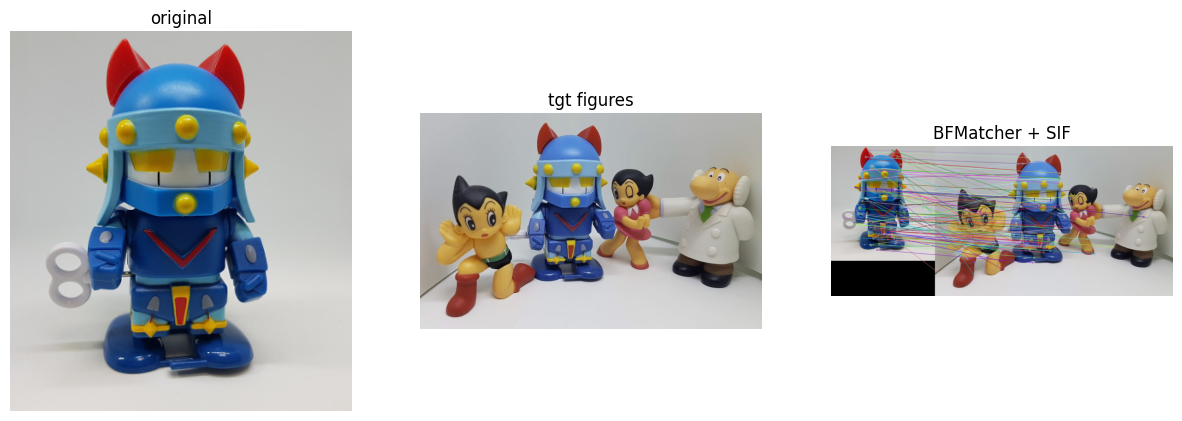

In [1]:
# BFMatcher and SIFT  (match_bf_sift.py)

import cv2, numpy as np

img1 = cv2.imread('./images/practice_img/taekwonv1.jpg')
img2 = cv2.imread('./images/practice_img/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

detector = cv2.SIFT_create() 
kp1, desc1 = detector.detectAndCompute(gray1, None)  # key points and descriptor
kp2, desc2 = detector.detectAndCompute(gray2, None)
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True) # BFMatcher, L1 dist, cross chk
matches = matcher.match(desc1, desc2)                 # matching
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS) # matching draw
cv2.imshow('BFMatcher + SIFT', res)
cv2.waitKey()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('tgt figures')
axs[2].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('BFMatcher + SIF')

plt.show()

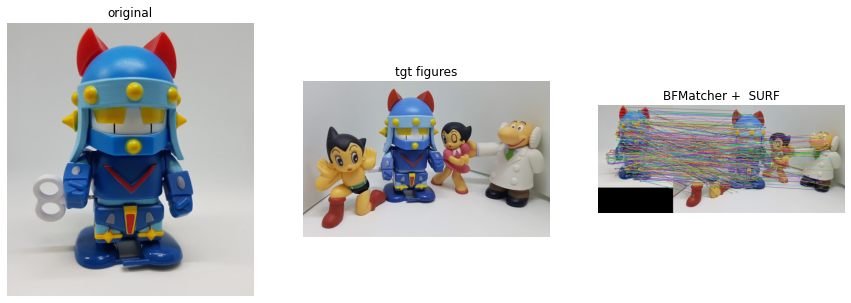

In [2]:
# BFMatcher and SURF (match_bf_surf.py)

import cv2
import numpy as np

img1 = cv2.imread('./images/practice_img/taekwonv1.jpg')
img2 = cv2.imread('./images/practice_img/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

detector = cv2.xfeatures2d.SURF_create()  # Python3.6 and opencv-contrib-python==[3.4.2.16]
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)
matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = matcher.match(desc1, desc2)
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2.imshow('BF + SURF', res)
cv2.waitKey()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('tgt figures')
axs[2].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('BFMatcher +  SURF')

plt.show()

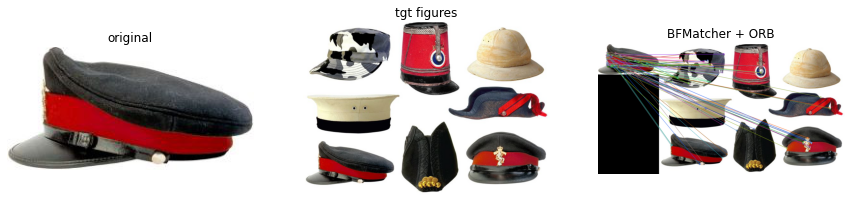

In [6]:
# BFMatcher and ORB (match_bf_orb.py)

import cv2, numpy as np

img1 = cv2.imread('./images/practice_img/hat.jpg')
# img1 = cv2.imread('./images/practice_img/taekwonv1.jpg')
# img2 = cv2.imread('./images/practice_img/figures.jpg')
img2 = cv2.imread('./images/practice_img/hats.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(desc1, desc2)
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2.imshow('BFMatcher + ORB', res)
cv2.waitKey()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('tgt figures')
axs[2].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('BFMatcher + ORB')

plt.show()

## ▶ FLANN(Fast Library for Approximate Nearest Neighbors Matching)  

BFMatcher searches all descriptors, which is very slow for large image sizes.   
To solve this, we can use FLANN.   
- Rather than looking at all descriptors, FLANN compares **neighboring descriptors**.   
- In order to find neighboring descriptors, we need to pass index parameters and search parameters to the FLANN algorithm function.
>- BFMatcher는 모든 디스크립터를 전수 조사하므로 이미지 사이즈가 클 경우 속도가 굉장히 느립니다.   
>- 이를 해결하기 위해 FLANN을 사용할 수 있습니다.   
>- FLANN은 모든 디스크립터를 전수 조사하기 보다 이웃하는 디스크립터끼리 비교를 합니다. 

OpenCV is a function for creating FLANN objects that uses cv2. FlannBasedMatcher()  

- **matcher = cv2.FlannBasedMatcher(indexParams, searchParams)**

>- indexParams: index Params (dict)  
>>- algorithm: algorithm type, 선택할 알고리즘에 따라 종속 키를 결정하면 됨
>>- FLANN_INDEX_LINEAR=0: LINEAR indexing, same as BFMatcher
>>- FLANN_INDEX_KDTREE=1: KD-tree indexing (trees=4: (16 recomd))
>>- FLANN_INDEX_KMEANS=2: K-MEANS tree indexing (branching=32, iterations=11, centers_init=0)
>>- FLANN_INDEX_COMPOSITE=3: KD-tree + K-MEANS indexing (trees=4, branching=32, iterations=11, centers_init=0: 초기 중심점 방식)
>>- FLANN_INDEX_LSH=6: LSH indexing (table_number: 해시 테이블 수, key_size: 키 비트 크기, multi_probe_level: 인접 버킷 검색)
>>- FLANN_INDEX_AUTOTUNED=255: AUTO TUNE indexing (target_precision=0.9, build_weight=0.01, memory_weight=0.0, sample_fraction=0.1)
>>
>>**<Ex for SIFT or SURF>**
>>> * FLANN_INDEDX_KDTREE = 1
>>> * index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
>>
>>**<Ex for ORB>**
>>>- FLANN_INDEX_LSH = 6
>>>- index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
>    
>- searchParams: search Params (dict)  
>>- checks=32: search tgt
>>- eps=0.0: error(option)
>>- sorted=True

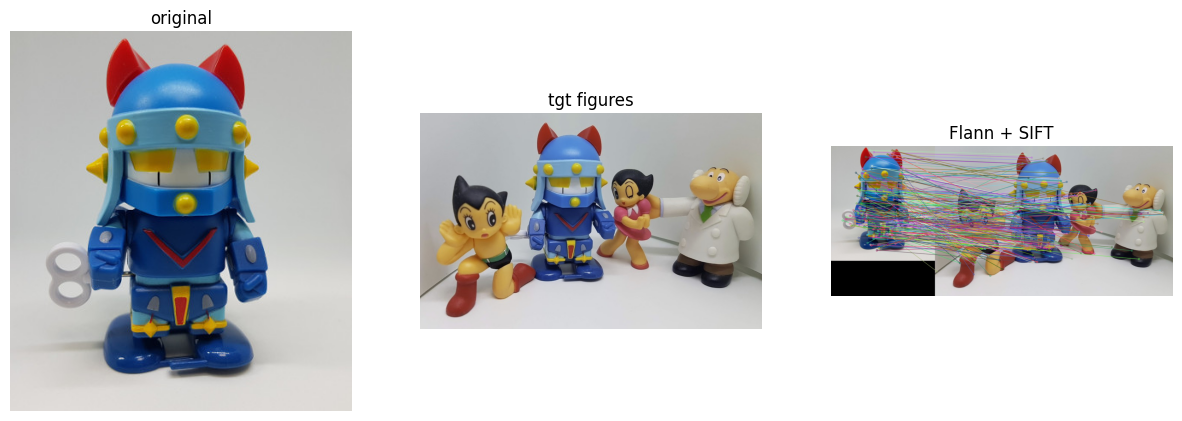

In [1]:
# FLANNMatcher and SIFT (match_flann_sift.py)

import cv2, numpy as np

img1 = cv2.imread('./images/practice_img/taekwonv1.jpg')
img2 = cv2.imread('./images/practice_img/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

detector = cv2.SIFT_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
matcher = cv2.FlannBasedMatcher(index_params, search_params)
matches = matcher.match(desc1, desc2)
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2.imshow('Flann + SIFT', res)
cv2.waitKey()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('tgt figures')
axs[2].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('Flann + SIFT')

plt.show()

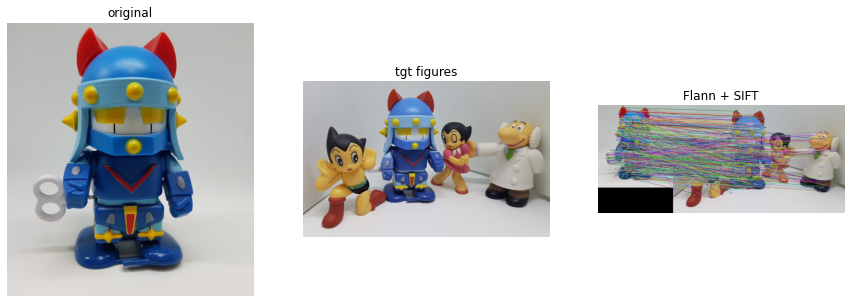

In [2]:
# FLANNMatcher and SURF (match_flann_surf.py)

import cv2, numpy as np

img1 = cv2.imread('./images/practice_img/taekwonv1.jpg')
img2 = cv2.imread('./images/practice_img/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
detector = cv2.xfeatures2d.SURF_create() 
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
matcher = cv2.FlannBasedMatcher(index_params, search_params)
matches = matcher.match(desc1, desc2)
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2.imshow('Flann + SURF', res)
cv2.waitKey()
cv2.destroyAllWindows() 

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('tgt figures')
axs[2].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('Flann + SIFT')

plt.show()

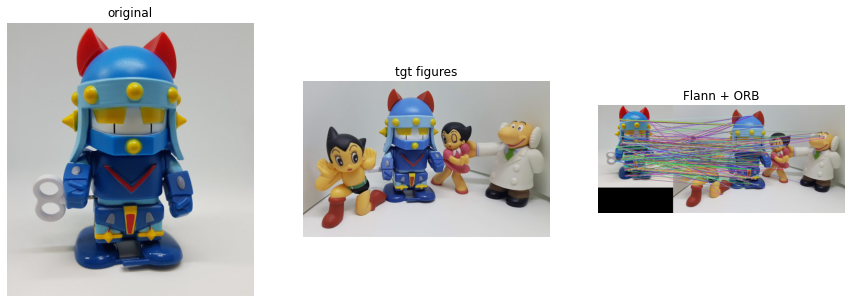

In [3]:
# FLANNMatcher and ORB  (match_flann_orb.py)

import cv2, numpy as np

img1 = cv2.imread('./images/practice_img/taekwonv1.jpg')
img2 = cv2.imread('./images/practice_img/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6,
                   key_size = 12,
                   multi_probe_level = 1)
search_params=dict(checks=32)
matcher = cv2.FlannBasedMatcher(index_params, search_params)
matches = matcher.match(desc1, desc2)
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
cv2.imshow('Flann + ORB', res)
cv2.waitKey()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('tgt figures')
axs[2].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('Flann + ORB')

plt.show()

The matching results we've looked at so far have too much incorrect matching information.   
For example, in the picture just above, there is a part that matches the robot and the doll wearing a white robe.   
This is clearly a mismatch.   
Therefore, additional work is required to remove incorrect matching results to find the correct matching point.  

지금까지 살펴본 매칭 결과에는 잘못된 매칭 정보가 너무 많습니다.   
가령 바로 위 그림에서 로보트와 흰 가운을 입고 있는 인형과 매칭이 되는 부분도 있습니다.   
이는 분명 잘못 매칭된 결과입니다.   
따라서 잘못된 매칭 결과를 제거하여 올바른 매칭점을 찾아내는 작업이 추가로 필요합니다.   
